In [50]:
import sys

sys.path.append('../libs')

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neuronas

importlib.reload(neuronas)
from neuronas import MLP


In [51]:
# Cargar el dataset
df = pd.read_csv("../data/Housing.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [52]:
# Extraer filas y columnas a utilizar, convertilas en arreglos de numpy y normalizar

# Extraer columnas relevantes como entradas
casas_entradas = df[["area", "bedrooms", "bathrooms", "stories"]].to_numpy()

# Extraer columna de salida (precio)
casas_salidas = df[["price"]].to_numpy()

# Normalizar entradas (min-max scaling)
min_vals = casas_entradas.min(axis=0)
max_vals = casas_entradas.max(axis=0)
casas_entradas_norm = (casas_entradas - min_vals) / (max_vals - min_vals)

# Normalizar salidas (precio)
min_vals = casas_salidas.min(axis=0)
max_vals = casas_salidas.max(axis=0)
casas_salidas_norm = (casas_salidas - min_vals) / (max_vals - min_vals)

casas_entradas_norm

array([[0.39656357, 0.6       , 0.33333333, 0.66666667],
       [0.5024055 , 0.6       , 1.        , 1.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        , 0.        ],
       [0.08659794, 0.4       , 0.        , 0.        ],
       [0.15120275, 0.4       , 0.        , 0.33333333]], shape=(545, 4))

In [53]:
RNA_MLP = MLP(layer_sizes=[4, 10, 1])

predicciones_precios_casas = RNA_MLP.feedforward(casas_entradas_norm)

predicciones_precios_casas


array([[0.50414959],
       [0.50415973],
       [0.50414707],
       [0.50414706],
       [0.50414377],
       [0.50414595],
       [0.50415624],
       [0.50415824],
       [0.50414426],
       [0.50414925],
       [0.50414616],
       [0.50414921],
       [0.50414638],
       [0.5041442 ],
       [0.50414553],
       [0.50414276],
       [0.50414641],
       [0.50415122],
       [0.50414324],
       [0.50414454],
       [0.50413982],
       [0.50414248],
       [0.50413989],
       [0.50414321],
       [0.50414624],
       [0.50414637],
       [0.50414943],
       [0.50414048],
       [0.50414912],
       [0.50414563],
       [0.50415048],
       [0.50414692],
       [0.50414518],
       [0.50414744],
       [0.5041451 ],
       [0.50415014],
       [0.5041479 ],
       [0.50415331],
       [0.5041462 ],
       [0.50415117],
       [0.50414141],
       [0.50414969],
       [0.50414977],
       [0.50415117],
       [0.50415117],
       [0.50414684],
       [0.50414943],
       [0.504

In [54]:
def imprimir_errores_histograma_tendencia_intervalos(y_real, y_hat):
    """
    Genera dos visualizaciones para evaluar los errores de predicción:
    - Un gráfico de dispersión con línea de tendencia y su intervalo de confianza.
    - Un histograma de los errores de predicción.

    Parámetros:
        y_real (np.ndarray): Valores reales del conjunto de datos.
        y_hat (np.ndarray): Valores predichos por el modelo.

    Retorna:
        None. Muestra las gráficas de evaluación en pantalla.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    # Gráfico de dispersión con línea de tendencia
    sns.scatterplot(x=y_real.flatten().tolist(), y=y_hat.flatten().tolist(),
                    color="blue", label="Errores de Predicción", ax=ax1)
    sns.regplot(x=y_real.flatten().tolist(), y=y_hat.flatten().tolist(),
                scatter=False, color="red", label="Tendencia e Intervalo de Confianza", ax=ax1)

    ax1.set_title('Errores de Predicción con Línea de Tendencia e Intervalo de Confianza')
    ax1.set_xlabel('Índice de la Observación')
    ax1.set_ylabel('Error de Predicción')
    ax1.legend()

    # Métricas de error
    mse = mean_squared_error(y_real, y_hat)
    rmse = sqrt(mse)
    mape = MAPE(y_real, y_hat)

    # Histograma de errores
    ax2.hist(y_hat - y_real, bins=20, alpha=0.7, label='Error de Predicción')
    ax2.axvline(x=0, color='r', linestyle='--')
    ax2.set_title(f'MSE: {mse:.2f} || $\\mathbf{{RMSE}}$: {rmse:.2f}')
    ax2.set_xlabel('Error')
    ax2.set_ylabel('Frecuencia')
    ax2.legend()

    fig.get_tight_layout()
    plt.show()

In [55]:
def MAPE(y_real, y_hat):
    """
    Calcula el error porcentual absoluto medio (MAPE),
    ignorando entradas reales que valen cero.

    Retorna:
        float: MAPE como porcentaje.
    """
    y_real, y_hat = np.array(y_real), np.array(y_hat)
    non_zero_mask = y_real != 0
    return np.mean(np.abs((y_real[non_zero_mask] - y_hat[non_zero_mask]) / y_real[non_zero_mask])) * 100

In [56]:
# DEMO 8
RNA_10HL_a = MLP(layer_sizes=[4, 10, 4, 1])
RNA_10HL_a.train(casas_entradas_norm, casas_salidas_norm, learning_rate=0.05, iterations=50)

predicciones_10HL_a = RNA_10HL_a.feedforward(casas_entradas_norm)
Yp_10HL_a = predicciones_10HL_a * (max_vals - min_vals) + min_vals # desmormalizar

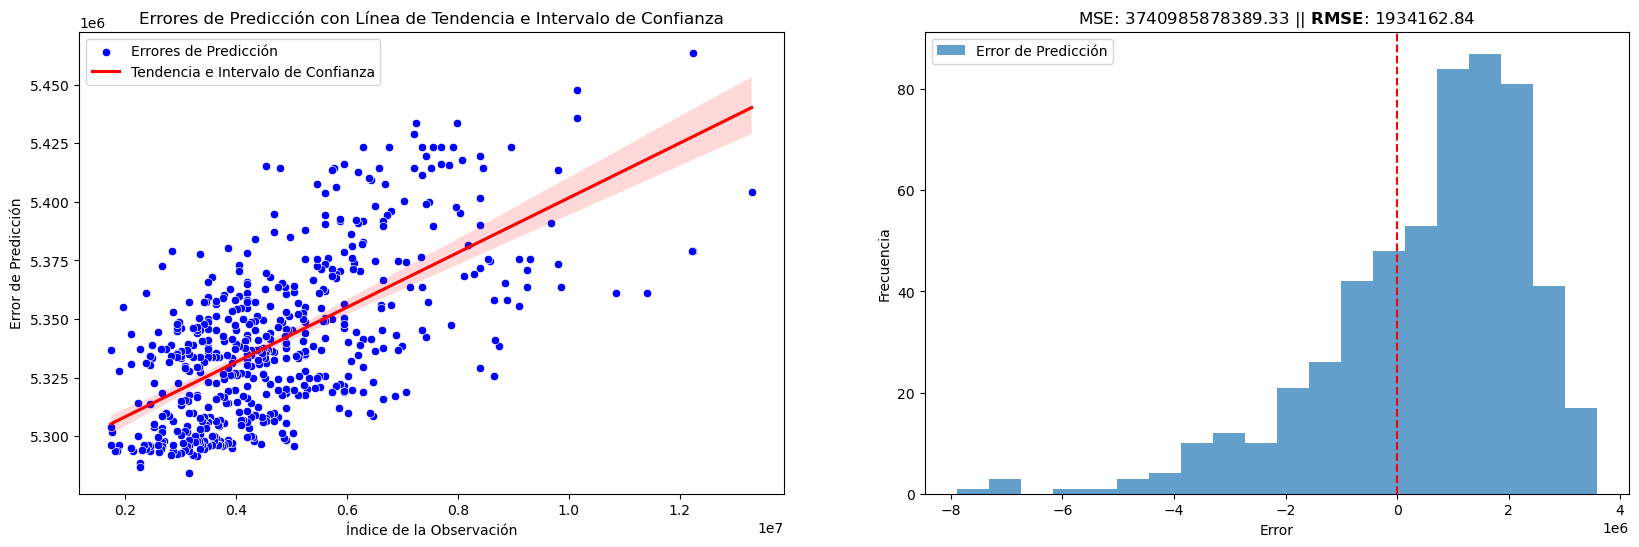

In [57]:
imprimir_errores_histograma_tendencia_intervalos(casas_salidas, Yp_10HL_a)

## Practica Redes Densas

### Reordenamiento de datos al azar

In [58]:
# Seleccionar aleatoriamente los indices
indices_reordenados = np.random.permutation(len(casas_entradas_norm))

x = casas_entradas_norm[indices_reordenados]
y = casas_salidas_norm[indices_reordenados]

### Dividir entrenamiento y prueba

In [59]:
# Seleccinar aleatoriamente el 80% de entrenamiento
index_for_train = np.random.choice(x.shape[0], int(x.shape[0] * 0.8), replace=False)

x_train = x[index_for_train]
y_train = y[index_for_train]
y_train_des = y_train * (max_vals - min_vals) + min_vals # Desnormalizar y_train

# Obtener el 20% de test
group_all_indexes_100p = set(range(x.shape[0]))
group_selected_indexes_80p = set(index_for_train)
group_not_selected_indexes_20p = group_all_indexes_100p - group_selected_indexes_80p
group_not_selected_indexes_20p = list(group_not_selected_indexes_20p)

x_test = x[group_not_selected_indexes_20p]
y_test = y[group_not_selected_indexes_20p]
y_test = y_test * (max_vals - min_vals) + min_vals # Desnormalizar y_test

### Learning reate: 0.05 y 10 épocas

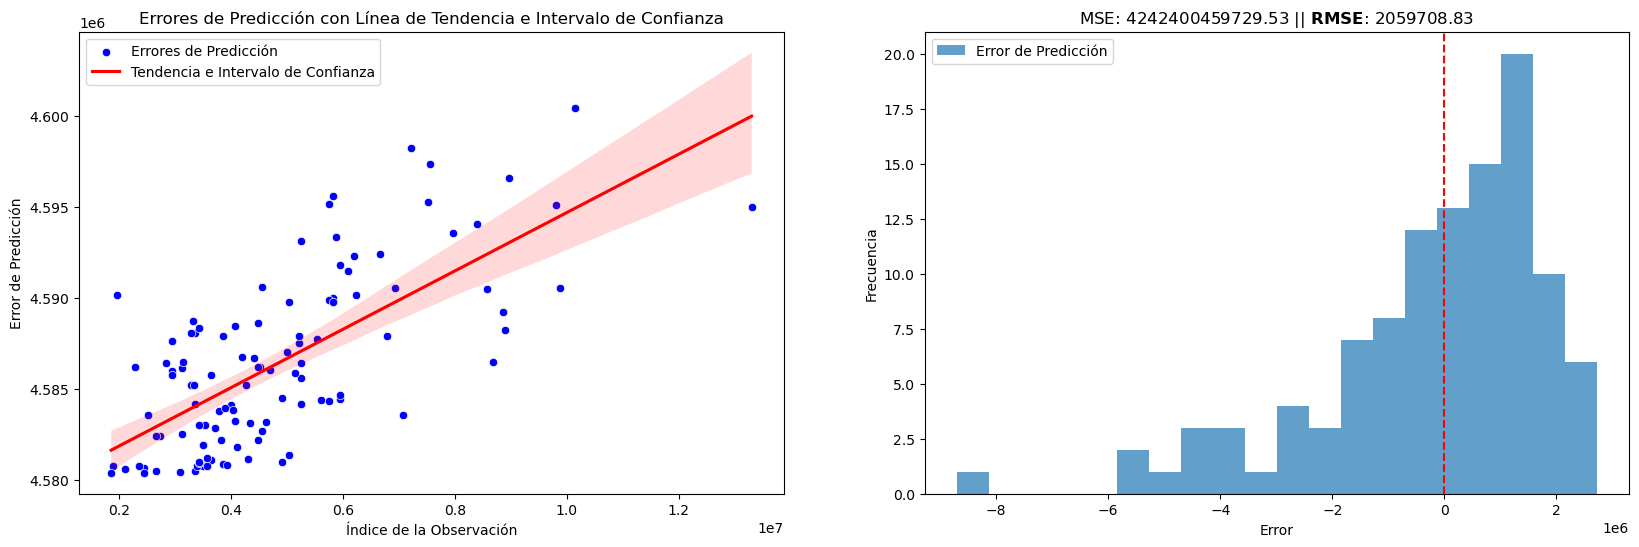

In [ ]:
RNA_10HL_1 = MLP(layer_sizes=[4, 10, 4, 1])
RNA_10HL_1.train(x_train, y_train, learning_rate=0.05, iterations=10)

predicciones_10HL_1 = RNA_10HL_1.feedforward(x_test)
Yp_10HL_1 = predicciones_10HL_1 * (max_vals - min_vals) + min_vals # desmormalizar

# RMSE en test
imprimir_errores_histograma_tendencia_intervalos(y_test, Yp_10HL_1)


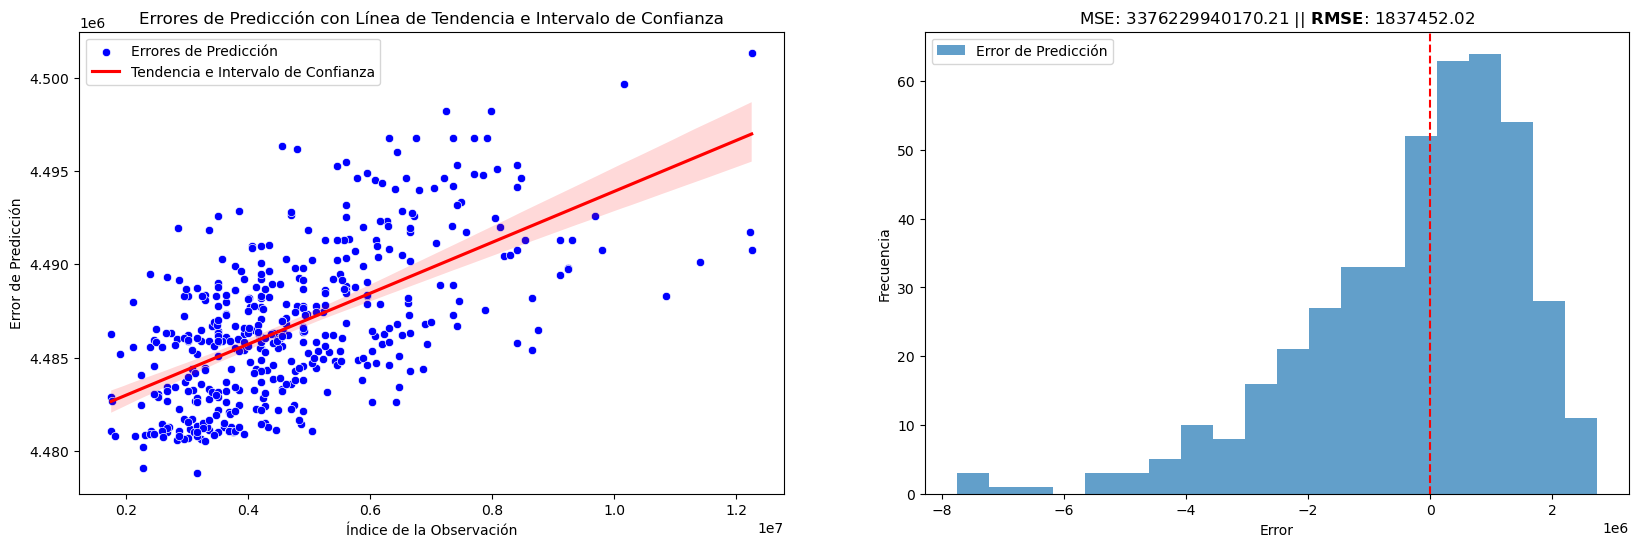

In [ ]:
predicciones_10HL_1t = RNA_10HL_1.feedforward(x_train)
Yp_10HL_1t = predicciones_10HL_1t * (max_vals - min_vals) + min_vals # desmormalizar

# RMSE en train
imprimir_errores_histograma_tendencia_intervalos(y_train_des, Yp_10HL_1t)

### Learning reate: 0.05 y 50 épocas

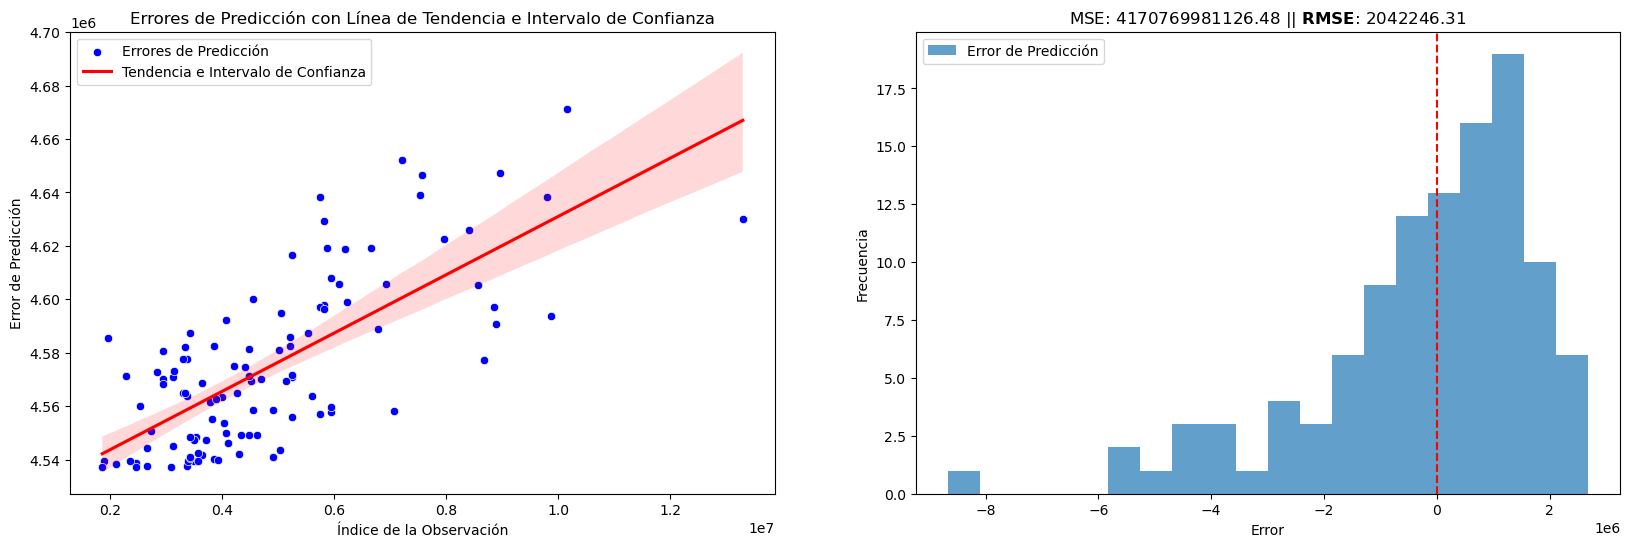

In [ ]:
RNA_10HL_2 = MLP(layer_sizes=[4, 10, 4, 1])
RNA_10HL_2.train(x_train, y_train, learning_rate=0.05, iterations=50)

predicciones_10HL_2 = RNA_10HL_2.feedforward(x_test)
Yp_10HL_2 = predicciones_10HL_2 * (max_vals - min_vals) + min_vals # desmormalizar

# RMSE en test
imprimir_errores_histograma_tendencia_intervalos(y_test, Yp_10HL_2)

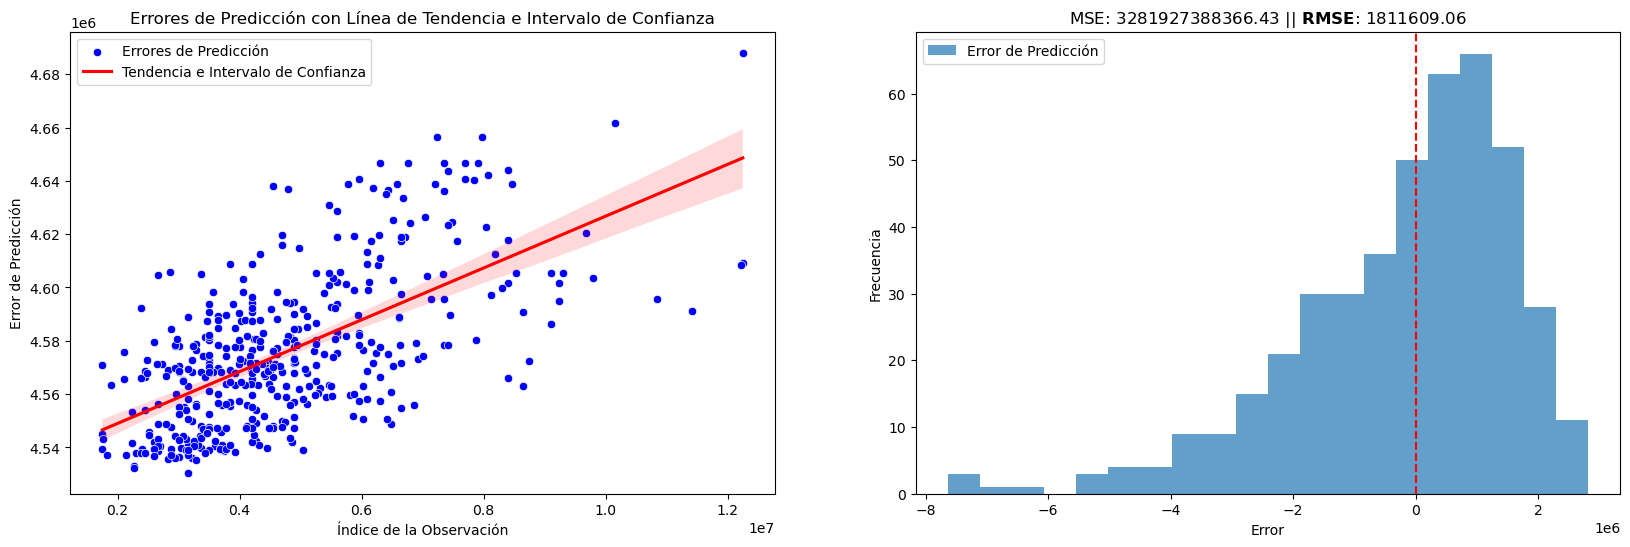

In [68]:
predicciones_10HL_2t = RNA_10HL_2.feedforward(x_train)
Yp_10HL_2t = predicciones_10HL_2t * (max_vals - min_vals) + min_vals # desmormalizar

# RMSE en train
imprimir_errores_histograma_tendencia_intervalos(y_train_des, Yp_10HL_2t)